# Homework 5

## William Olsen

The purpose of this homework is to work carefully through a numeric/simulted solution to Bayes' Theorem. Bayes' Theorem reads:

𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)=𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑑𝑎𝑡𝑎)
 
Effectively the goal of this homework (and the lab) is to find  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎) .

Reading through Bayes' theorem it says that given a data reading, the probability it was produced by a given true signal  (𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)) , is equal to the probability of getting a particular data reading given a certain true signal  (𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙))  times the probability of the signal having a particular strength  (𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)) , divided by the probability of each data reading  (𝑃(𝑑𝑎𝑡𝑎)) .

This is just math, so is true. But in practice it is quite subtle how to use this. A few pointers:
- 𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)  is what we want to know. What was the probability distribution of the true signal given the measurement we have? Unfortunately it is hard to calculate from first principles.
- 𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)  Is usually easy to determine. If we have a signal-free background (see first 4 weeks of this class), we can inject fake signals of known strength and then simulate the observations in the presence of known (fake) signals. This means we can easily generate  𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙) .
- 𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)  is called a prior. It is the probability the signal has a particular strength. Priors can be used to great effect, such as in combining the results of multiple particle physics experiments. But it is also the source of 90\% of all statistical mistakes. It is incredibly dangerous. Almost all of the time—and always in this class—we will want a weak/uniform prior. One of the most dangerous bits of using Bayes' Theorem is that it is easy to have an implicit prior which will give you the wrong answer and you don't know why.
- 𝑃(𝑑𝑎𝑡𝑎)  in the denominator is almost always just a normalization factor, and is often dropped. This means the result will have to be renormalized, usually by making sure the full  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙|𝑑𝑎𝑡𝑎)  integrates to one.

So the homework is to numerically work through this equation.

## Problem 1

### Part A

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  𝜎 , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑠𝑖𝑔𝑛𝑎𝑙) .

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings.

In [1]:
# general imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

In [15]:
# define our background parameters
p1_mean = 0
p1_std = 3

# draw data for our background
bkgd = stats.norm.rvs(loc=p1_mean, scale=p1_std, size=1000000)

# draw data for our signal
signal_low = 0.0
signal_high = 20.0
signal = np.random.uniform(low=signal_low, high=signal_high, size=1000000)

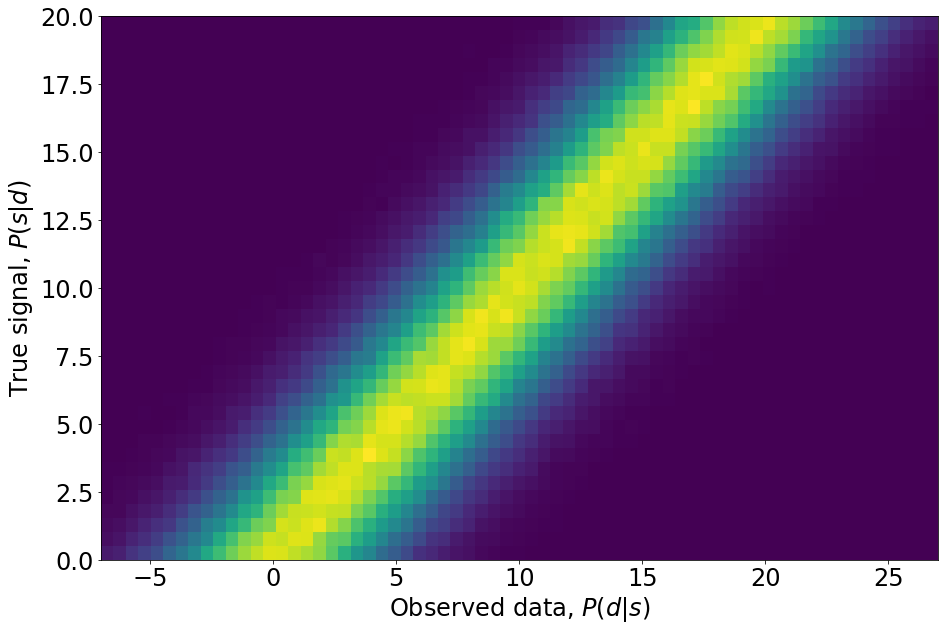

In [18]:
# define our overall data
data = bkgd + signal

# define our bin edges
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

# group the results into bins
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

# plot
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T, shading='auto')
plt.tick_params(labelsize=24)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

### Part B

Select a true injected signal and plot 𝑃(𝑑|𝑠).  Label this plot and clearly explain what is being plotted and how to interpret it.

### Part C

Select a true injected signal and plot 𝑃(𝑠|𝑑).  Label this plot and clearly explain what is being plotted and how to interpret it.